<center><h1>Iris Species</h1></center>

<img src='img/flowers.jpeg' width='1000px' height='1000px'>

# Preprocessing of data
- Import necessary packages required
- Read the required CSV
- how the head of the csv Dataframe
- Look at the info of the Dataframe 
- Look to see if there are any null values

In [2]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('CSV/Iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# EDA(Exploratory Data Analysis)

- Looking at the differnt features of the various species of flowers to see distiguishable differences.

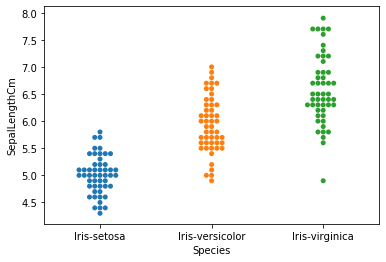

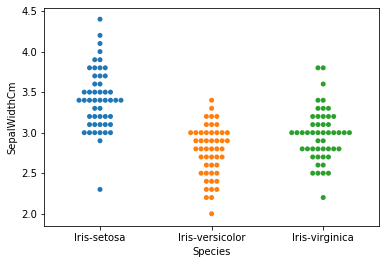

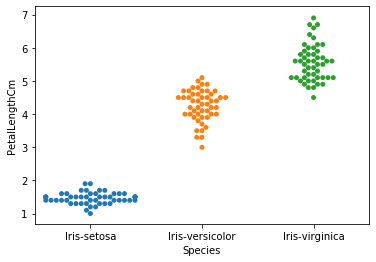

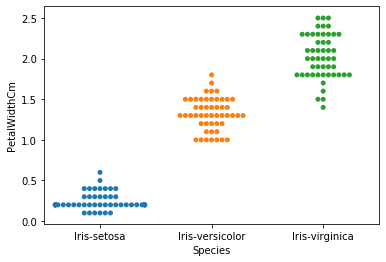

In [5]:
for i in ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']:
    sns.swarmplot(y=i, x="Species", data=data)
    plt.show()

## My conclusion HERE

# The Elbow Method

<blockquote> To find the optimum number of clusters we will look for the elbow to use in our model 

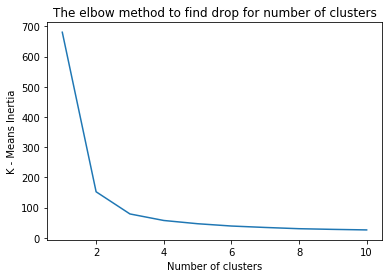

In [6]:
x = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow method to find drop for number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('K - Means Inertia')
plt.show()

## Here we make our Model

- We use the K Means model
- We will fit it
- We predict 
- Seeing our clusters with the different features

In [7]:
k_means = KMeans(init = "k-means++", n_clusters = 3,random_state=0)
k_means.fit(x)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [8]:
data["Clus_km"] = labels

In [9]:
def changeNum(row):
    if row == 'Iris-setosa':
        return 1
    elif row == 'Iris-versicolor':
        return 0
    else:
        return 2

In [10]:
data['Species_Target'] = data['Species'].apply(changeNum)

In [11]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# Score

In [13]:
accuracy_score(data.Species_Target, labels)

0.8933333333333333

# EDA showing our different clusters for different features

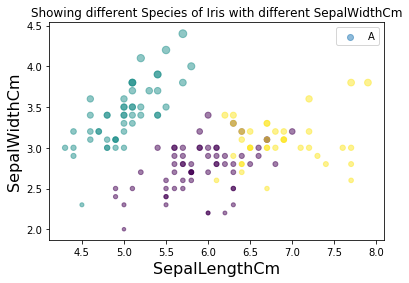

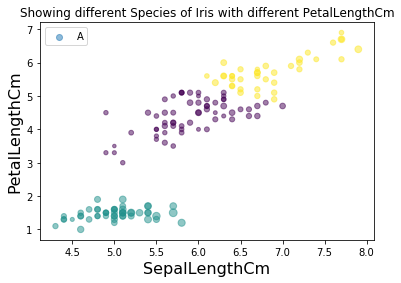

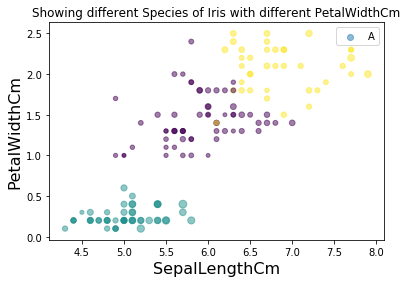

In [15]:
for i in [1,2,3]:
    area = np.pi * ( x[:, 1])**2  
    plt.scatter(x[:, 0], x[:, i], s=area, c=labels.astype(np.float), alpha=0.5)
    plt.legend(labels = ['A','B','C'])
    plt.xlabel('SepalLengthCm', fontsize=16)
    if i == 1:
        plt.title('Showing different Species of Iris with different SepalWidthCm')
        plt.ylabel('SepalWidthCm', fontsize=16)
    elif i == 2:
        plt.title('Showing different Species of Iris with different PetalLengthCm')
        plt.ylabel('PetalLengthCm', fontsize=16)
    else:
        plt.title('Showing different Species of Iris with different PetalWidthCm')
        plt.ylabel('PetalWidthCm', fontsize=16)
    plt.show()